# HavocMapper Analysis and Visuals
## By Multiple Collaborators
---

### Imports and bringing in cleaned CSV file

In [109]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [110]:
# Bring in refined CSV file
fema_disasters = pd.read_csv('Assets/CSVs/femaDisasters_clean.csv')

# Bring in summary CSV File
disasters_summary = pd.read_csv('Assets/CSVs/disasters_summary.csv')

## Alex's Section

In [111]:
disasters_alex = fema_disasters.copy()

In [112]:
grouped_data = disasters_alex.groupby(['incidentType', 'state', 'declarationTitle']).size().reset_index(name='count')
grouped_data.head(15)

,incidentType,state,declarationTitle,count
0,Coastal Storm,AK,SEVERE STORM,2
1,Coastal Storm,CA,"COASTAL STORMS, FLOODS, SLIDES & TORNADOES",40
2,Coastal Storm,CA,"TORRENTIAL RAIN, HIGH TIDE & WINDS",3
3,Coastal Storm,CO,HURRICANE KATRINA EVACUATION,64
4,Coastal Storm,DE,SEVERE COASTAL STORM & FLOODING,1
5,Coastal Storm,FL,"SEVERE STORMS, TORNADOES AND FLOODING ASSOCIAT...",11
6,Coastal Storm,FL,TROPICAL STORM AGNES,14
7,Coastal Storm,LA,TROPICAL STORM ALLISON,27
8,Coastal Storm,LA,TROPICAL STORM BARRY,41
9,Coastal Storm,LA,TROPICAL STORM CRISTOBAL,64


In [113]:
disaster_by_state = disasters_alex.groupby('state').size().reset_index(name='total_disasters')
disaster_by_state = disaster_by_state.sort_values(by='total_disasters', ascending=False)
disaster_by_state

,state,total_disasters
50,TX,4779
10,FL,2635
20,KY,2554
28,MO,2510
21,LA,2398
12,GA,2333
41,OK,2305
32,NC,2101
44,PR,1835
30,MS,1777


In [114]:
disaster_by_type = disasters_alex.groupby(['state', 'incidentType']).size().reset_index(name='count')
disaster_by_type = disaster_by_type.sort_values(by='count', ascending=False)
disaster_by_type.head(25)

,state,incidentType,count
141,LA,Hurricane,1450
68,FL,Hurricane,1432
193,MO,Severe Storm,1387
342,TX,Hurricane,1370
215,NC,Hurricane,1300
339,TX,Fire,1229
134,KY,Severe Storm,1156
126,KS,Severe Storm,1095
284,OK,Severe Storm,1041
80,GA,Hurricane,1031


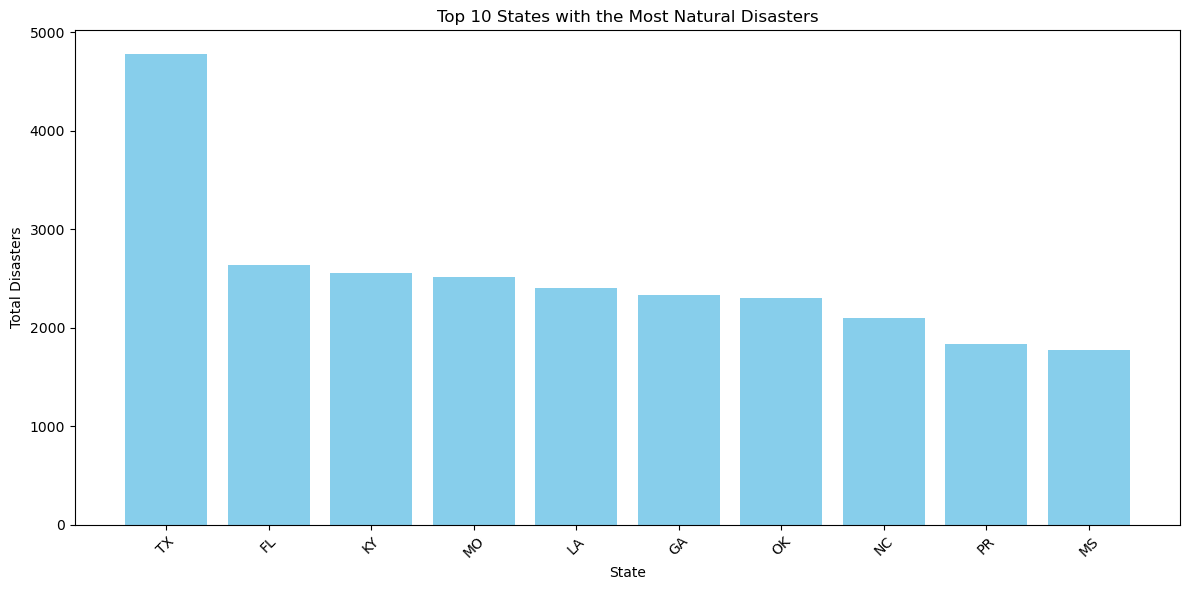

In [115]:
top_states = disaster_by_state.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_states['state'], top_states['total_disasters'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Disasters')
plt.title('Top 10 States with the Most Natural Disasters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Assets/Figures/Alex/Top10_States_MostDisasters.png')
plt.show()

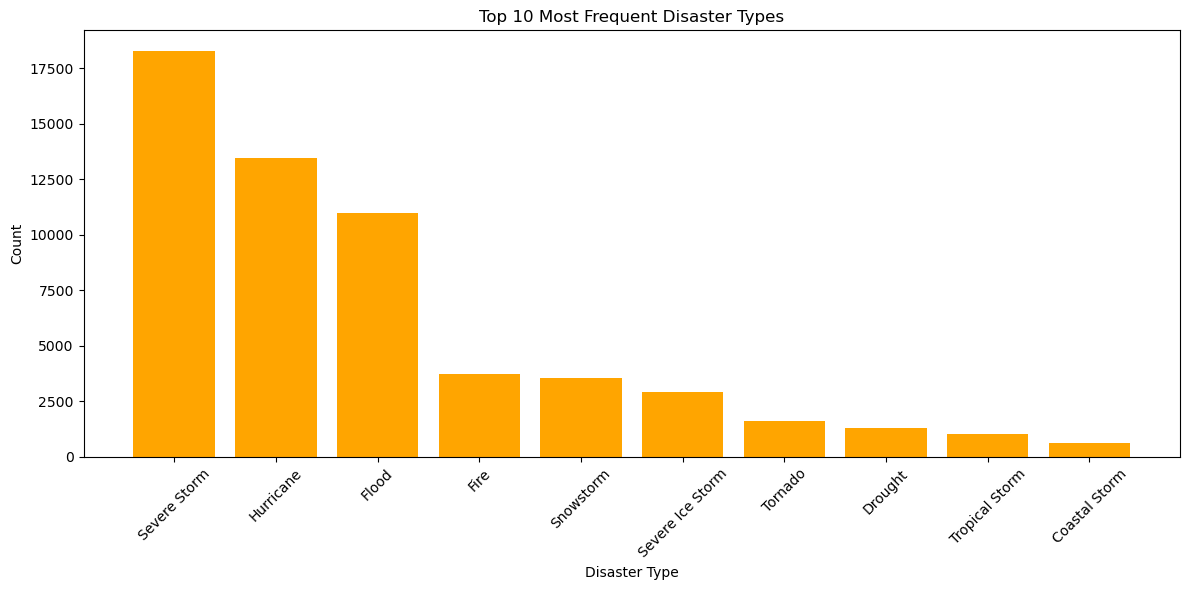

In [116]:
top_disaster_types = disaster_by_type.groupby('incidentType')['count'].sum().reset_index()
top_disaster_types = top_disaster_types.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_disaster_types['incidentType'], top_disaster_types['count'], color='orange')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Disaster Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Assets/Figures/Alex/Top10_MostFrequent_Disasters.png')
plt.show()

In [117]:
most_common_disasters = disaster_by_type.loc[
    disaster_by_type.groupby('state')['count'].idxmax()]
most_common_disasters = most_common_disasters.sort_values(by='count', ascending=False)
most_common_disasters


,state,incidentType,count
141,LA,Hurricane,1450
68,FL,Hurricane,1432
193,MO,Severe Storm,1387
342,TX,Hurricane,1370
215,NC,Hurricane,1300
134,KY,Severe Storm,1156
126,KS,Severe Storm,1095
284,OK,Severe Storm,1041
80,GA,Hurricane,1031
304,PR,Hurricane,1024


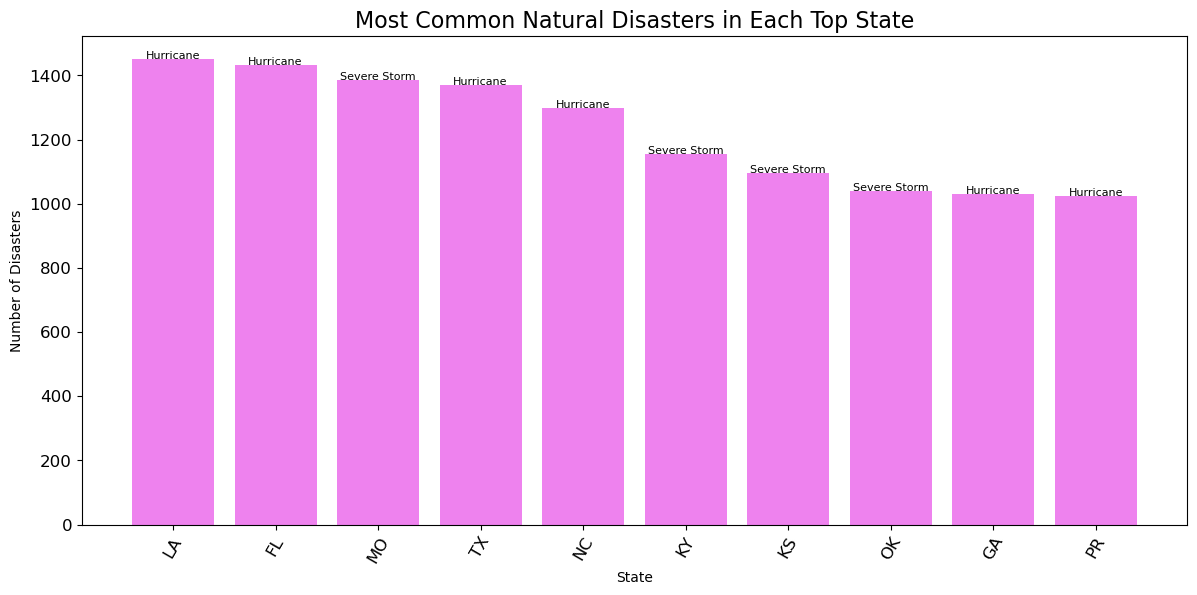

In [118]:
top_states_disasters = most_common_disasters.head(10)
states = top_states_disasters['state']
disasters = top_states_disasters['incidentType']
counts = top_states_disasters['count']

plt.figure(figsize=(12, 6))
plt.bar(states, counts, color='violet')
for i, disaster in enumerate(disasters):
    plt.text(i, counts.iloc[i] + 0.5, disaster, ha='center', fontsize=8)
plt.xlabel('State')
plt.ylabel('Number of Disasters')
plt.title('Most Common Natural Disasters in Each Top State', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Assets/Figures/Alex/MostCommonDisasters_byTopStates.png')
plt.show()

In [119]:
incident_counts = disasters_alex['incidentType'].value_counts()
max_disasters = incident_counts.max()
min_disasters = incident_counts.min()
max_disaster_type = incident_counts.idxmax()
min_disaster_type = incident_counts.idxmin()
print(f"Maximum disasters: {max_disasters} ({max_disaster_type})")
print(f"Minimum disasters: {min_disasters} ({min_disaster_type})")

Maximum disasters: 18296 (Severe Storm)
Minimum disasters: 2 (Straight-Line Winds)


In [120]:
texas_disasters = disasters_alex[disasters_alex['state'] == 'TX']
num_texas_disasters = texas_disasters.shape[0]
print(f"Texas had {num_texas_disasters} natural disasters.")

Texas had 4779 natural disasters.


In [121]:
disasters_alex['declarationDate'] = pd.to_datetime(disasters_alex['declarationDate'], errors='coerce')
data = disasters_alex.dropna(subset=['declarationDate'])
data['Month'] = disasters_alex['declarationDate'].dt.month
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
data['Season'] = data['Month'].apply(assign_season)
monthly_counts = data['Month'].value_counts().sort_index()
seasonal_counts = data['Season'].value_counts()
print("Disaster Occurrences by Month:")
print(monthly_counts)

print("\nDisaster Occurrences by Season:")
print(seasonal_counts)

Disaster Occurrences by Month:
Month
1      4902
2      4404
3      5157
4      4484
5      4879
6      4830
7      4954
8      5730
9     11404
10     3823
11     1578
12     2018
Name: count, dtype: int64

Disaster Occurrences by Season:
Season
Fall      16805
Summer    15514
Spring    14520
Winter    11324
Name: count, dtype: int64


In [122]:
hurricane_counts = data[data['incidentType'] == 'Hurricane'].groupby('state').size()
most_hurricanes_state = hurricane_counts.idxmax()
most_hurricanes_count = hurricane_counts.max()
print(f"The state with the most hurricanes is {most_hurricanes_state} with {most_hurricanes_count} hurricanes.")


The state with the most hurricanes is LA with 1450 hurricanes.


In [123]:
severe_storm_counts = data[data['incidentType'] == 'Severe Storm'].groupby('state').size()
most_severe_storms_state = severe_storm_counts.idxmax()
most_severe_storms_count = severe_storm_counts.max()
print(f"The state with the most severe storms is {most_severe_storms_state} with {most_severe_storms_count} severe storms.")


The state with the most severe storms is MO with 1387 severe storms.


## Avenika's Section

In [124]:
disasters_avenika = fema_disasters.copy()

In [125]:
earliest_declaration_year = disasters_avenika["declarationDate"].min()
earliest_declaration_year

'1953-05-02'

In [126]:
latest_declaration_year = disasters_avenika["declarationDate"].max()
latest_declaration_year

'2025-01-08'

In [127]:
total_of_natural_disaster = disasters_avenika["incidentType"].count()
total_of_natural_disaster

58163

In [128]:
# Counts of declaration types 
# DR = Major Disasters, EM = Emergency Declatation, FM = Fire Management)
# For more info see README (in progress)
disasters_avenika['declarationType'].value_counts()

declarationType
DR    40463
EM    15711
FM     1989
Name: count, dtype: int64

In [129]:
# Counts of natural disaster types
disasters_avenika['incidentType'].value_counts()

incidentType
Severe Storm           18296
Hurricane              13465
Flood                  11007
Fire                    3753
Snowstorm               3576
Severe Ice Storm        2938
Tornado                 1621
Drought                 1291
Tropical Storm          1034
Coastal Storm            637
Freezing                 290
Typhoon                  128
Winter Storm             116
Tsunami                    9
Straight-Line Winds        2
Name: count, dtype: int64

In [130]:
# Validating no NaNs
disasters_avenika.count()

disasterNumber              58163
declarationRequestNumber    58163
declarationTitle            58163
area                        58163
areaType                    58163
state                       58163
incidentType                58163
declarationType             58163
declarationDate             58163
incidentBeginDate           58163
tribalRequest               58163
ihProgramDeclared           58163
iaProgramDeclared           58163
paProgramDeclared           58163
hmProgramDeclared           58163
latitude                    58163
longitude                   58163
dtype: int64

In [131]:
# Filter: Natural disasters per State
disasters_avenika['state'].value_counts()

state
TX    4779
FL    2635
KY    2554
MO    2510
LA    2398
GA    2333
OK    2305
NC    2101
PR    1835
MS    1777
VA    1762
IA    1716
KS    1608
AL    1603
TN    1531
CA    1525
AR    1472
MN    1405
NE    1336
ND    1280
IN    1279
NY    1272
SD    1169
WV    1127
PA    1118
IL    1109
OH    1100
SC    1039
WA     827
WI     725
MI     595
NJ     556
CO     531
OR     530
MT     506
ME     426
MD     380
VT     377
NM     376
MA     365
NH     300
AZ     275
ID     262
CT     245
UT     193
NV     184
AK     183
RI     106
WY      86
HI      85
VI      79
MP      67
AS      61
MH      50
DE      47
FM      30
GU      19
DC      18
PW       1
Name: count, dtype: int64

In [132]:
# Filter: Natural disasters per hit area
disasters_avenika['area'].value_counts()

area
Washington                      587
Jefferson                       505
Franklin                        477
Jackson                         473
Lincoln                         422
                               ... 
Skokomish Indian Reservation      1
Shoalwater Bay Reservation        1
Quinault Indian Reservation       1
Nisqually Indian Reservation      1
Namorik                           1
Name: count, Length: 2110, dtype: int64

In [133]:
# Extract decleration_year from declarationDate

declarationDate = disasters_avenika["declarationDate"]
df= pd.DataFrame(declarationDate)
df["declarationDate"] = pd.to_datetime(df["declarationDate"])
df["declaration_year"] = df["declarationDate"].dt.year
print(df)

      declarationDate  declaration_year
0          2024-08-12              2024
1          2024-08-09              2024
2          2024-08-06              2024
3          2024-08-02              2024
4          2024-07-27              2024
...               ...               ...
58158      2011-04-08              2011
58159      2011-04-08              2011
58160      2011-03-25              2011
58161      2011-03-25              2011
58162      2011-03-25              2011

[58163 rows x 2 columns]


In [134]:
declaration_year = df["declaration_year"]
declaration_year.head()

0    2024
1    2024
2    2024
3    2024
4    2024
Name: declaration_year, dtype: int32

In [135]:
#adding declaration_year to disasters_avenika data set 
disasters_avenika["declaration_year"] = df["declaration_year"]
disasters_avenika.head()

,disasterNumber,declarationRequestNumber,declarationTitle,area,areaType,state,incidentType,declarationType,declarationDate,incidentBeginDate,tribalRequest,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,latitude,longitude,declaration_year
0,5530,24123,GOLD RANCH FIRE,Washoe,County,NV,Fire,FM,2024-08-12,2024-08-11,0,0,0,1,1,40.584905,-119.613161,2024
1,5529,24122,LEE FALLS FIRE,Washington,County,OR,Fire,FM,2024-08-09,2024-08-08,0,0,0,1,1,45.560188,-123.058791,2024
2,5528,24116,ELK LANE FIRE,Jefferson,County,OR,Fire,FM,2024-08-06,2024-08-04,0,0,0,1,1,44.722434,-123.007389,2024
3,5527,24111,MILE MARKER 132 FIRE,Deschutes,County,OR,Fire,FM,2024-08-02,2024-08-02,0,0,0,1,1,44.156923,-121.258700,2024
4,5522,24102,BOREL FIRE,Kern,County,CA,Fire,FM,2024-07-27,2024-07-25,0,0,0,1,1,35.314570,-118.753822,2024


In [136]:
#Count Severe Stroms trend by year 

sever_storms_by_year = disasters_avenika.groupby("declaration_year")["incidentType"].value_counts().sort_index()
sever_storms_by_year

declaration_year  incidentType  
1953              Fire                1
                  Flood               5
                  Tornado             6
1954              Flood               7
                  Hurricane           6
                                   ... 
2024              Tornado            51
                  Tropical Storm    915
                  Winter Storm       37
2025              Fire                8
                  Severe Storm       15
Name: count, Length: 432, dtype: int64

In [137]:
disasters_avenika["incidentType"].value_counts()

incidentType
Severe Storm           18296
Hurricane              13465
Flood                  11007
Fire                    3753
Snowstorm               3576
Severe Ice Storm        2938
Tornado                 1621
Drought                 1291
Tropical Storm          1034
Coastal Storm            637
Freezing                 290
Typhoon                  128
Winter Storm             116
Tsunami                    9
Straight-Line Winds        2
Name: count, dtype: int64

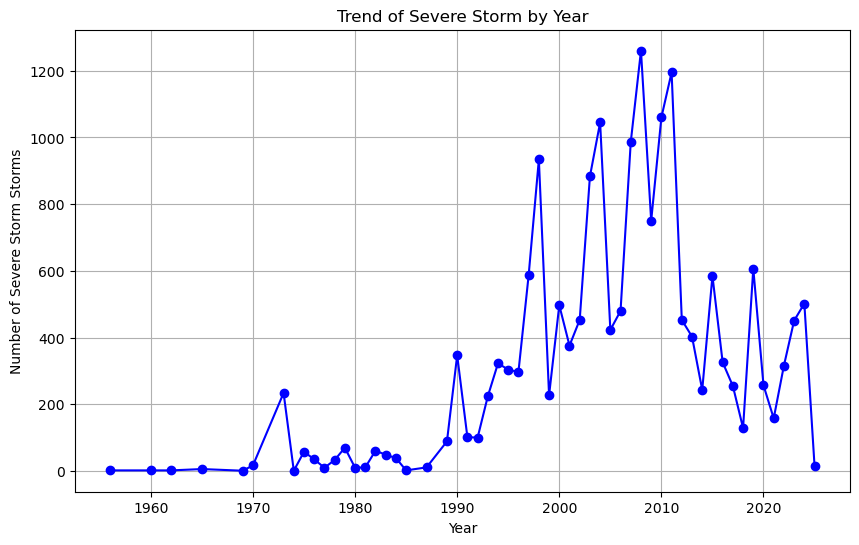

In [138]:
# Count Severe Storm data by year
# Your original code, generating the count of incident types by year
sever_storms_by_year = disasters_avenika.groupby("declaration_year")["incidentType"].value_counts().sort_index()

# Filter for 'Severe Storm' and create a new series for plotting
severe_storms = sever_storms_by_year.xs("Severe Storm", level="incidentType")

# Plotting the data
severe_storms.plot(kind='line', figsize=(10, 6), color='b', marker='o')

# Adding title and labels
plt.title('Trend of Severe Storm by Year')
plt.xlabel('Year')
plt.ylabel('Number of Severe Storm Storms')
plt.grid(True)

# Show the plot
plt.savefig('Assets/Figures/Avenika/SevereStormTrend_byYear.png')
plt.show()

In [139]:
#Statistial Data on Sever Storme 
sever_storm_data = severe_storms.describe()
sever_storm_data

count      57.000000
mean      320.982456
std       340.003282
min         1.000000
25%        35.000000
50%       243.000000
75%       453.000000
max      1260.000000
Name: count, dtype: float64

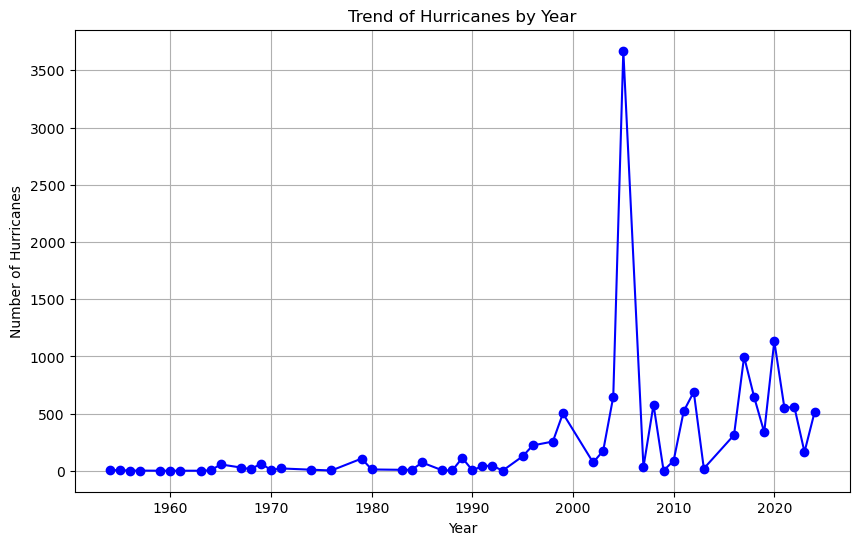

In [140]:
#Count Hurricane trend by year 
# Your original code, generating the count of incident types by year
hurricane_by_year = disasters_avenika.groupby("declaration_year")["incidentType"].value_counts().sort_index()

# Filter for 'Huricanes' and create a new series for plotting
hurricane_data = hurricane_by_year.xs("Hurricane", level="incidentType")

# Plotting the data
hurricane_data.plot(kind='line', figsize=(10, 6), color='b', marker='o')

# Adding title and labels
plt.title('Trend of Hurricanes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.grid(True)

# Show the plot
plt.savefig('Assets/Figures/Avenika/HurricaneTrend_byYear.png')
plt.show()

In [141]:
#Statistial Data on Sever Storme 
hurricane_describe = hurricane_data.describe()
hurricane_describe

count      53.000000
mean      254.056604
std       551.799762
min         1.000000
25%         6.000000
50%        46.000000
75%       313.000000
max      3671.000000
Name: count, dtype: float64

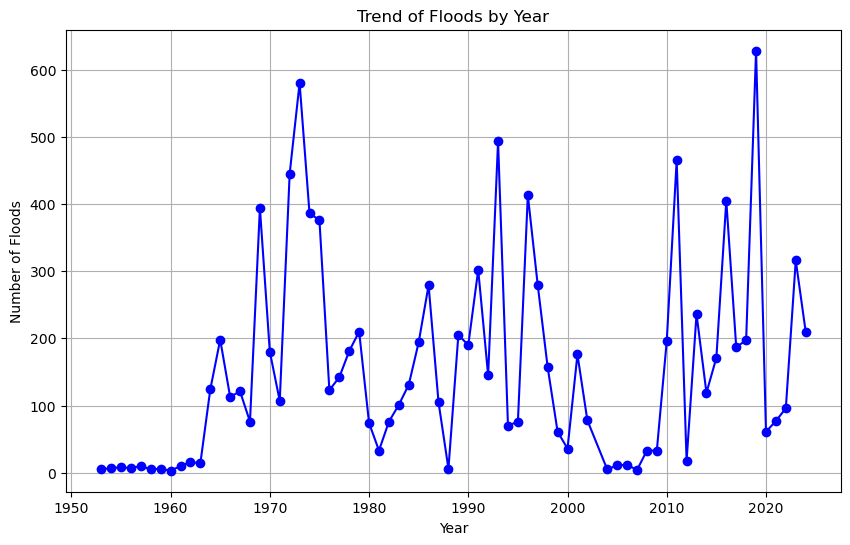

In [142]:
#Count Flood trend by year 
# Your original code, generating the count of incident types by year
flood_by_year = disasters_avenika.groupby("declaration_year")["incidentType"].value_counts().sort_index()

# Filter for 'Severe Storm' and create a new series for plotting
flood_data = flood_by_year.xs("Flood", level="incidentType")

# Plotting the data
flood_data.plot(kind='line', figsize=(10, 6), color='b', marker='o')

# Adding title and labels
plt.title('Trend of Floods by Year')
plt.xlabel('Year')
plt.ylabel('Number of Floods')
plt.grid(True)

# Show the plot
plt.savefig('Assets/Figures/Avenika/FloodTrend_byYear.png')
plt.show()

In [143]:
#Statistial Data on Flood 
flood_data = flood_by_year.describe()
flood_data

count     432.000000
mean      134.636574
std       272.482154
min         1.000000
25%         7.000000
50%        34.000000
75%       147.500000
max      3671.000000
Name: count, dtype: float64

## Claudia's Section

In [144]:
disasters_claudia = fema_disasters.copy()

In [145]:
# Sample top of data
disasters_claudia.head()

,disasterNumber,declarationRequestNumber,declarationTitle,area,areaType,state,incidentType,declarationType,declarationDate,incidentBeginDate,tribalRequest,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,latitude,longitude
0,5530,24123,GOLD RANCH FIRE,Washoe,County,NV,Fire,FM,2024-08-12,2024-08-11,0,0,0,1,1,40.584905,-119.613161
1,5529,24122,LEE FALLS FIRE,Washington,County,OR,Fire,FM,2024-08-09,2024-08-08,0,0,0,1,1,45.560188,-123.058791
2,5528,24116,ELK LANE FIRE,Jefferson,County,OR,Fire,FM,2024-08-06,2024-08-04,0,0,0,1,1,44.722434,-123.007389
3,5527,24111,MILE MARKER 132 FIRE,Deschutes,County,OR,Fire,FM,2024-08-02,2024-08-02,0,0,0,1,1,44.156923,-121.258700
4,5522,24102,BOREL FIRE,Kern,County,CA,Fire,FM,2024-07-27,2024-07-25,0,0,0,1,1,35.314570,-118.753822


In [146]:
# Convert dates to datetime
disasters_claudia['declarationDate'] = pd.to_datetime(disasters_claudia['declarationDate'])
disasters_claudia['incidentBeginDate'] = pd.to_datetime(disasters_claudia['incidentBeginDate'])

# Calculate time to declare
disasters_claudia['time_to_declare'] = (disasters_claudia['declarationDate'] - disasters_claudia['incidentBeginDate']).dt.days

# # Summary statistics for time_to_declare
disasters_claudia['time_to_declare'].describe()

count    58163.000000
mean        20.624641
std         28.488696
min       -266.000000
25%          1.000000
50%          8.000000
75%         31.000000
max        730.000000
Name: time_to_declare, dtype: float64

In [147]:
program_cols = ['ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared', 'hmProgramDeclared']
disasters_claudia[program_cols].sum()

ihProgramDeclared     7197
iaProgramDeclared    16816
paProgramDeclared    54033
hmProgramDeclared    25377
dtype: int64

In [148]:
disasters_claudia['total_programs'] = disasters_claudia[program_cols].sum(axis = 1)

In [149]:
#correlation matrix
program_cols = ['ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared', 'hmProgramDeclared']
program_cols

['ihProgramDeclared',
 'iaProgramDeclared',
 'paProgramDeclared',
 'hmProgramDeclared']

In [150]:
#corelation matrix
disasters_claudia[program_cols].corr()

,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared
ihProgramDeclared,1.000000,0.154586,-0.178891,0.419233
iaProgramDeclared,0.154586,1.000000,-0.303430,-0.197370
paProgramDeclared,-0.178891,-0.303430,1.000000,-0.043066
hmProgramDeclared,0.419233,-0.197370,-0.043066,1.000000


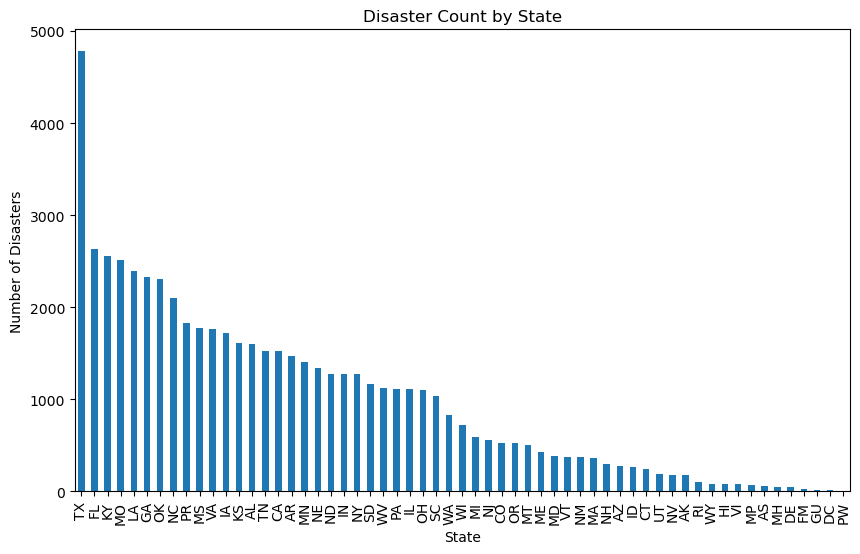

In [151]:
state_disaster_count = disasters_claudia['state'].value_counts()

# Plot
state_disaster_count.plot(kind='bar', figsize=(10, 6), title="Disaster Count by State")
plt.xlabel("State")
plt.ylabel("Number of Disasters")
plt.savefig('Assets/Figures/Claudia/DisasterCount_byState.png')
plt.show()

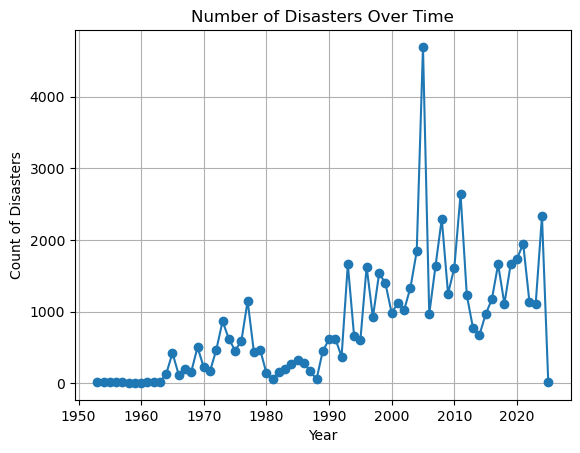

In [152]:
# Extract year from declarationDate
disasters_claudia['declarationYear'] = disasters_claudia['declarationDate'].dt.year

# Count disasters by year
yearly_disasters = disasters_claudia['declarationYear'].value_counts().sort_index()

# Plot trends over time
plt.plot(yearly_disasters.index, yearly_disasters.values, marker='o')
plt.title("Number of Disasters Over Time")
plt.xlabel("Year")
plt.ylabel("Count of Disasters")
plt.grid()
plt.savefig('Assets/Figures/Claudia/DisasterNumber_overTime.png')
plt.show()

In [153]:
# Filter disasters between 2000 and 2010
disasters_claudia['declarationDate'] = pd.to_datetime(disasters_claudia['declarationDate'])
disasters_2000_2010 = disasters_claudia[
    (disasters_claudia['declarationDate'] >= '2000-01-01') & (disasters_claudia['declarationDate'] <= '2010-12-31')
]

# Display the filtered dataset
disasters_2000_2010[['incidentType', 'state', 'declarationDate']]


,incidentType,state,declarationDate
940,Fire,PR,2009-10-24
941,Fire,PR,2009-10-24
942,Fire,PR,2009-10-24
943,Fire,PR,2009-10-24
944,Fire,PR,2009-10-24
...,...,...,...
56648,Freezing,FL,2001-02-05
56649,Freezing,FL,2001-02-05
56650,Freezing,FL,2001-02-05
56651,Freezing,FL,2001-02-05


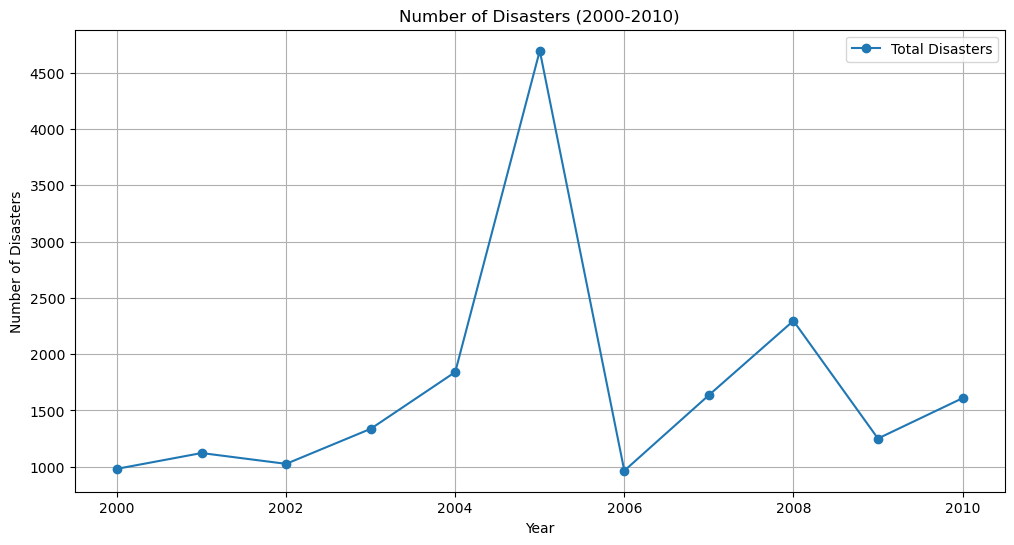

In [154]:
# Extract year from declarationDate
disasters_2000_2010['year'] = disasters_2000_2010['declarationDate'].dt.year

# Count disasters by year
yearly_disasters = disasters_2000_2010['year'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(yearly_disasters.index, yearly_disasters.values, marker='o', linestyle='-', label="Total Disasters")
plt.title("Number of Disasters (2000-2010)")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.grid()
plt.legend()
plt.savefig('Assets/Figures/Claudia/DisasterNumbers_byYear.png')
plt.show()

In [155]:
# Filter disasters for 2005
disasters_2005 = disasters_claudia[disasters_claudia['declarationDate'].dt.year == 2005]

# Display the dataset for 2005
disasters_2005[['incidentType', 'state', 'declarationDate']]

,incidentType,state,declarationDate
2115,Fire,OK,2005-12-29
2116,Fire,OK,2005-12-28
2117,Fire,TX,2005-12-28
2118,Fire,OK,2005-12-28
2119,Fire,TX,2005-12-28
...,...,...,...
56476,Typhoon,AS,2005-02-18
56477,Typhoon,AS,2005-02-18
56478,Typhoon,AS,2005-02-18
56479,Typhoon,AS,2005-02-18


In [156]:
# Count disasters by state
state_count_2005 = disasters_2005['state'].value_counts()

# Display results
print(state_count_2005)


state
TX    765
LA    260
IN    231
OH    176
GA    159
KY    152
KS    151
NC    147
AL    141
MS    135
FL    122
IL    118
MO    114
NE    104
ND    103
SD    102
IA     99
TN     95
VA     95
MN     87
OK     84
NY     83
MI     83
CA     82
PA     78
AR     75
WI     73
CO     66
WV     61
MT     56
ME     55
NV     53
SC     46
ID     45
AZ     43
UT     43
WA     42
MA     40
OR     37
NH     35
NM     35
NJ     30
MD     23
CT     21
PR     17
RI     10
HI      5
AS      5
AK      4
DE      3
MP      3
DC      1
WY      1
Name: count, dtype: int64


In [157]:
# Extract the month from the declaration date
disasters_2005['month'] = disasters_2005['declarationDate'].dt.month

# Count disasters by month
monthly_disasters_2005 = disasters_2005['month'].value_counts().sort_index()

# Display results
monthly_disasters_2005


month
1      163
2      234
3       32
4       80
5        1
6       31
7      156
8      289
9     3564
10      39
11      63
12      42
Name: count, dtype: int64

Above we see that in the year 2005 september there was the highest spike of natural disasters 

In [158]:
# Filter for a specific incident type (e.g., "Hurricane")
hurricane_2005 = disasters_2005[disasters_2005['incidentType'] == 'Hurricane']

# Display hurricane data for 2005
hurricane_2005[['state', 'declarationDate']]


,state,declarationDate
35500,FL,2005-10-24
35501,FL,2005-10-24
35502,FL,2005-10-24
35503,FL,2005-10-24
35504,FL,2005-10-24
...,...,...
44383,AL,2005-07-10
44384,AL,2005-07-10
44385,AL,2005-07-10
44386,AL,2005-07-10


In [159]:
# Group data by year and count the number of disasters
yearly_disasters = disasters_claudia['declarationYear'].value_counts().sort_index()

# Calculate percentage change year-over-year
yearly_disasters_percentage_change = yearly_disasters.pct_change() * 100  # Convert to percentage

# Combine the counts and percentage change into a single DataFrame for better visualization
yearly_disasters_summary = pd.DataFrame({
    'Disaster Count': yearly_disasters,
    'Percentage Change (%)': yearly_disasters_percentage_change
})

# Display the summary
yearly_disasters_summary


,Disaster Count,Percentage Change (%)
declarationYear,,
1953,12,NaN
1954,14,16.666667
1955,15,7.142857
1956,14,-6.666667
1957,15,7.142857
...,...,...
2021,1947,12.154378
2022,1134,-41.756549
2023,1111,-2.028219


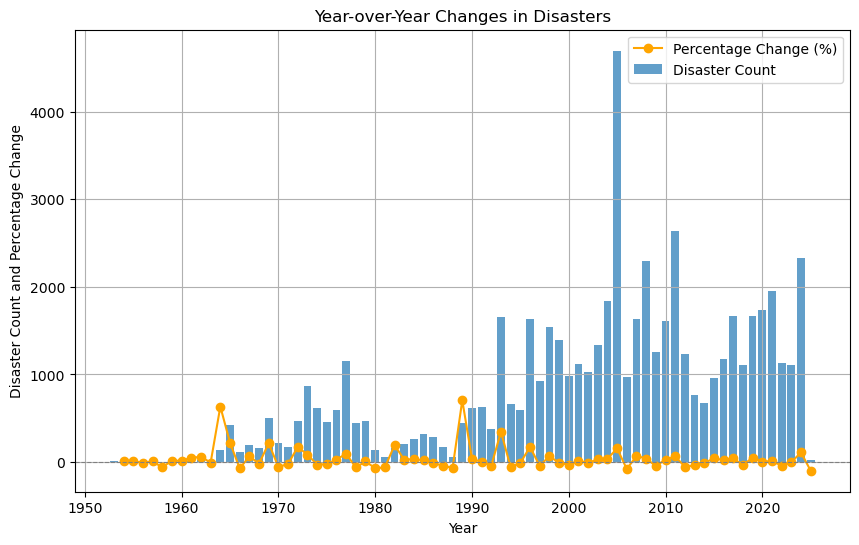

In [160]:
plt.figure(figsize=(10, 6))
plt.bar(yearly_disasters.index, yearly_disasters.values, alpha=0.7, label="Disaster Count")
plt.plot(yearly_disasters.index, yearly_disasters_percentage_change, marker='o', color='orange', label="Percentage Change (%)")
plt.title("Year-over-Year Changes in Disasters")
plt.xlabel("Year")
plt.ylabel("Disaster Count and Percentage Change")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid()
plt.savefig('Assets/Figures/Claudia/Year_over_year_disasters.png')
plt.show()

In [161]:
# Find the year with the largest percentage change
max_change_year = yearly_disasters_summary['Percentage Change (%)'].idxmax()
max_change_value = yearly_disasters_summary['Percentage Change (%)'].max()

# Calculate the average percentage change (excluding the first NaN value)
average_change = yearly_disasters_summary['Percentage Change (%)'].mean()

# Print results
print(f"Year with the largest percentage change: {max_change_year} ({max_change_value:.2f}%)")
print(f"Average percentage change: {average_change:.2f}%")

Year with the largest percentage change: 1989 (705.36%)
Average percentage change: 38.90%


Above we can see that Natural Disasters declared by FEMA over time has significantly increased

In [162]:
time_by_state = disasters_claudia.groupby('state')['time_to_declare'].mean().sort_values()
time_by_state

state
PR     7.795640
FL     8.321442
NC     9.128986
LA     9.155129
GA     9.451350
AS     9.901639
AL     9.950717
VI    10.708861
MP    10.865672
SC    11.225217
GU    11.578947
TX    14.653065
MS    15.326393
WV    15.535049
PA    15.555456
CO    15.920904
NJ    16.088129
MI    16.563025
HI    16.847059
VA    17.284904
AR    17.956522
PW    18.000000
NV    18.114130
CA    18.368525
OK    20.227766
OH    20.329091
TN    20.329197
OR    20.907547
WI    21.689655
DE    21.936170
AZ    22.032727
MD    22.752632
NM    22.813830
MO    23.390438
MA    25.427397
KY    25.442835
RI    25.518868
CT    25.534694
IL    26.342651
WY    26.523256
IN    26.847537
IA    26.973193
NY    28.535377
NH    28.973333
ID    29.580153
MN    30.402135
VT    30.885942
FM    32.600000
NE    33.372006
ME    33.612676
UT    34.155440
DC    35.277778
WA    35.772672
KS    38.422886
MT    42.922925
MH    44.220000
ND    45.681250
SD    49.800684
AK    52.393443
Name: time_to_declare, dtype: float64

In [163]:
time_by_incident = disasters_claudia.groupby('incidentType')['time_to_declare'].mean().sort_values()
time_by_incident

incidentType
Drought                 2.789311
Hurricane               7.511029
Coastal Storm           9.048666
Tornado                 9.358421
Tropical Storm         10.517408
Typhoon                13.984375
Fire                   15.325873
Severe Ice Storm       17.103131
Flood                  25.022622
Snowstorm              25.104027
Tsunami                26.666667
Straight-Line Winds    30.000000
Severe Storm           31.016561
Freezing               42.586207
Winter Storm           70.370690
Name: time_to_declare, dtype: float64

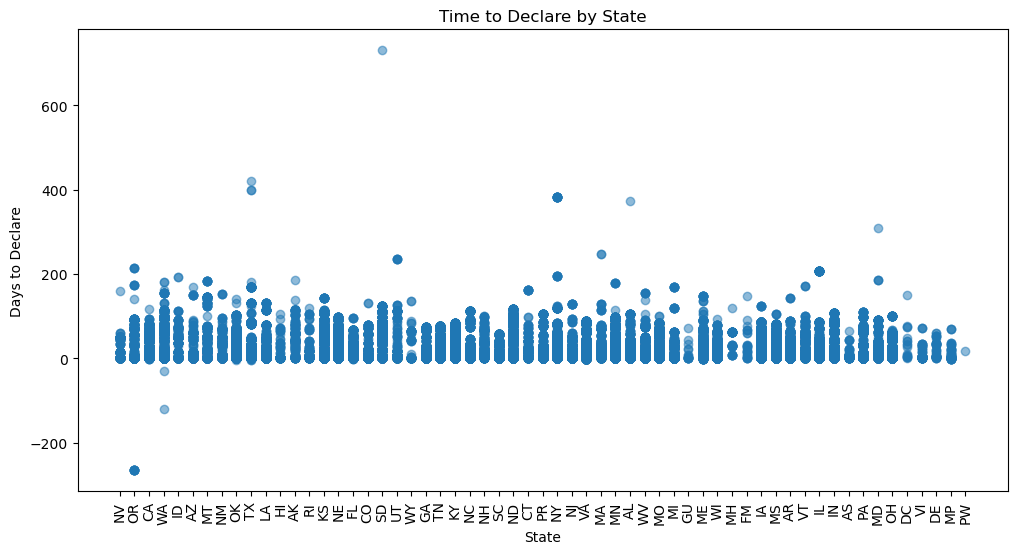

In [164]:
plt.figure(figsize=(12, 6))
plt.scatter(disasters_claudia['state'], disasters_claudia['time_to_declare'], alpha=0.5)
plt.title("Time to Declare by State")
plt.xlabel("State")
plt.ylabel("Days to Declare")
plt.xticks(rotation=90)
plt.savefig('Assets/Figures/Claudia/TimeForDeclaration_byState.png')
plt.show()

In [165]:
disasters_claudia['cycle_time'] = disasters_claudia['declarationDate'] - disasters_claudia['incidentBeginDate']
disasters_claudia['cycle_time'] = disasters_claudia['cycle_time'].dt.days
cycle_time_by_state = disasters_claudia.groupby('state')['cycle_time'].mean().sort_values()
cycle_time_by_state

state
PR     7.795640
FL     8.321442
NC     9.128986
LA     9.155129
GA     9.451350
AS     9.901639
AL     9.950717
VI    10.708861
MP    10.865672
SC    11.225217
GU    11.578947
TX    14.653065
MS    15.326393
WV    15.535049
PA    15.555456
CO    15.920904
NJ    16.088129
MI    16.563025
HI    16.847059
VA    17.284904
AR    17.956522
PW    18.000000
NV    18.114130
CA    18.368525
OK    20.227766
OH    20.329091
TN    20.329197
OR    20.907547
WI    21.689655
DE    21.936170
AZ    22.032727
MD    22.752632
NM    22.813830
MO    23.390438
MA    25.427397
KY    25.442835
RI    25.518868
CT    25.534694
IL    26.342651
WY    26.523256
IN    26.847537
IA    26.973193
NY    28.535377
NH    28.973333
ID    29.580153
MN    30.402135
VT    30.885942
FM    32.600000
NE    33.372006
ME    33.612676
UT    34.155440
DC    35.277778
WA    35.772672
KS    38.422886
MT    42.922925
MH    44.220000
ND    45.681250
SD    49.800684
AK    52.393443
Name: cycle_time, dtype: float64

In [166]:
# Summary statistics for cycle time by incident type
incident_type_analysis = disasters_claudia.groupby('incidentType')['cycle_time'].describe()

# Display the result
print(incident_type_analysis)

                       count       mean        std    min   25%   50%   75%  \
incidentType                                                                  
Coastal Storm          637.0   9.048666  15.432012    0.0   2.0   6.0   9.0   
Drought               1291.0   2.789311  10.545534    0.0   0.0   0.0   0.0   
Fire                  3753.0  15.325873  30.666271 -120.0   0.0   1.0  27.0   
Flood                11007.0  25.022622  34.576148    0.0   0.0  10.0  40.0   
Freezing               290.0  42.586207  41.389129    0.0   0.0  51.0  66.0   
Hurricane            13465.0   7.511029  14.136012   -2.0   1.0   3.0   8.0   
Severe Ice Storm      2938.0  17.103131  21.047507    0.0   3.0   8.0  25.0   
Severe Storm         18296.0  31.016561  28.273745 -266.0   8.0  24.0  48.0   
Snowstorm             3576.0  25.104027  33.699840    0.0   3.0  12.0  40.0   
Straight-Line Winds      2.0  30.000000   0.000000   30.0  30.0  30.0  30.0   
Tornado               1621.0   9.358421  16.358687  

In [167]:
# Average cycle time by incident type
average_cycle_time = disasters_claudia.groupby('incidentType')['cycle_time'].mean().sort_values()

# Display the result
print(average_cycle_time)

incidentType
Drought                 2.789311
Hurricane               7.511029
Coastal Storm           9.048666
Tornado                 9.358421
Tropical Storm         10.517408
Typhoon                13.984375
Fire                   15.325873
Severe Ice Storm       17.103131
Flood                  25.022622
Snowstorm              25.104027
Tsunami                26.666667
Straight-Line Winds    30.000000
Severe Storm           31.016561
Freezing               42.586207
Winter Storm           70.370690
Name: cycle_time, dtype: float64


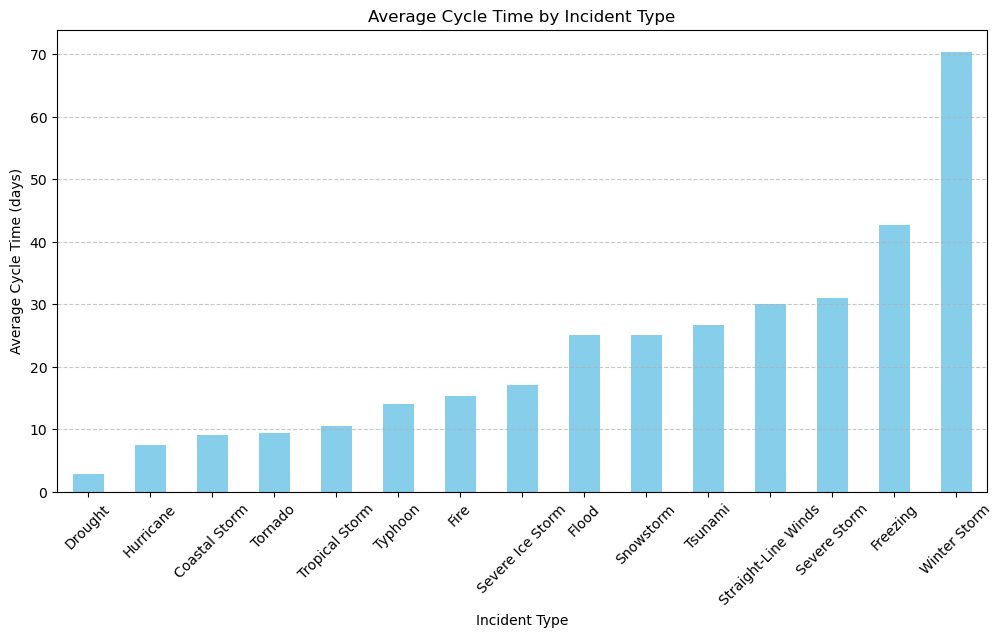

In [168]:
# Plot average cycle time
plt.figure(figsize=(12, 6))
average_cycle_time.plot(kind='bar', color='skyblue')
plt.title('Average Cycle Time by Incident Type')
plt.xlabel('Incident Type')
plt.ylabel('Average Cycle Time (days)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Assets/Figures/Claudia/AvgCycleTime_byType.png')
plt.show()

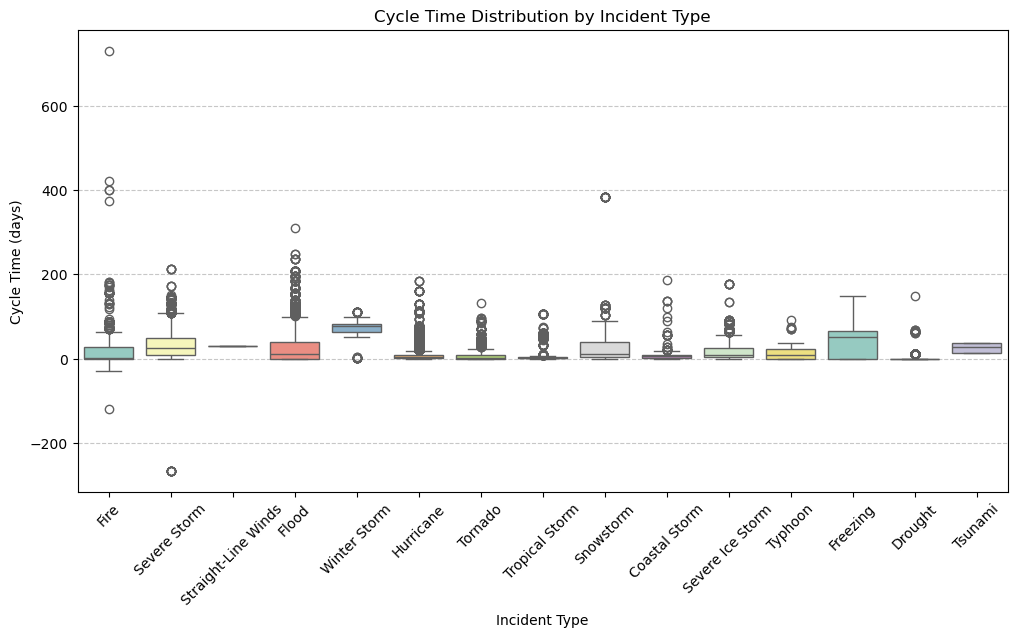

In [169]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='incidentType', y='cycle_time', data=disasters_claudia, palette='Set3')
plt.title('Cycle Time Distribution by Incident Type')
plt.xlabel('Incident Type')
plt.ylabel('Cycle Time (days)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Assets/Figures/Claudia/CycleTimeDistr_byType.png')
plt.show()

In [170]:
# Sort the data by declarationDate
disasters_claudia_sorted = disasters_claudia.sort_values(by='declarationDate')

# Display the sorted dataset
disasters_claudia_sorted[['incidentType', 'state', 'declarationDate']]

,incidentType,state,declarationDate
48259,Tornado,GA,1953-05-02
48258,Tornado,TX,1953-05-15
26178,Flood,LA,1953-05-29
47187,Tornado,MI,1953-06-02
26063,Flood,MT,1953-06-06
...,...,...,...
9330,Severe Storm,MO,2025-01-01
2491,Fire,OR,2025-01-01
3056,Fire,CA,2025-01-07
3054,Fire,CA,2025-01-08


In [171]:
# Filter by a specific incident type
specific_incident = disasters_claudia_sorted[disasters_claudia_sorted['incidentType'] == 'Fire']

# Display states and dates for the specific incident type
print(specific_incident[['state', 'declarationDate']])

     state declarationDate
3752    NH      1953-07-02
3751    CA      1956-12-29
3750    ID      1960-07-22
3749    CA      1961-11-16
3747    ID      1967-08-30
...    ...             ...
2494    OR      2025-01-01
2491    OR      2025-01-01
3056    CA      2025-01-07
3054    CA      2025-01-08
3055    CA      2025-01-08

[3753 rows x 2 columns]


In [172]:
# Count disasters by state
state_disaster_count = disasters_claudia['state'].value_counts()

# Display the state with the most disasters
most_disaster_state = state_disaster_count.idxmax()
most_disaster_count = state_disaster_count.max()
print(f"The state with the most disasters is {most_disaster_state} with {most_disaster_count} disasters.")

The state with the most disasters is TX with 4779 disasters.


In [173]:
# Filter the dataset for the state with the most disasters
state_with_most_disasters = disasters_claudia[disasters_claudia['state'] == most_disaster_state]

# Count incident types in that state
incident_type_count = state_with_most_disasters['incidentType'].value_counts()

# Display the most common incident type
most_common_incident = incident_type_count.idxmax()
most_common_count = incident_type_count.max()
print(f"The most common incident type in {most_disaster_state} is {most_common_incident} with {most_common_count} occurrences.")

The most common incident type in TX is Hurricane with 1370 occurrences.


In [174]:
# Group by state and incident type, then count
state_incident_summary = disasters_claudia.groupby(['state', 'incidentType']).size().unstack(fill_value=0)

# Find the most common incident type for each state
most_common_by_state = state_incident_summary.idxmax(axis=1)
most_common_count_by_state = state_incident_summary.max(axis=1)

# Combine results into a DataFrame
state_summary = pd.DataFrame({
    'Most Common Incident Type': most_common_by_state,
    'Count of Most Common Type': most_common_count_by_state,
    'Total Disasters': state_disaster_count
}).reset_index().rename(columns={'index': 'State'})

# Display the full summary
print(state_summary)

   state Most Common Incident Type  Count of Most Common Type  Total Disasters
0     AK              Severe Storm                         72              183
1     AL                 Hurricane                        678             1603
2     AR              Severe Storm                        651             1472
3     AS                 Hurricane                         25               61
4     AZ                      Fire                         95              275
5     CA                      Fire                        476             1525
6     CO                     Flood                        160              531
7     CT                 Hurricane                         96              245
8     DC              Severe Storm                          9               18
9     DE                 Hurricane                         22               47
10    FL                 Hurricane                       1432             2635
11    FM                   Typhoon                  

## Neel's Section